In [23]:
import os
from PIL import Image
import numpy as np

def convert_16bit_to_8bit(directory, output_directory):
    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # Get a list of all subdirectories within the main directory
    subdirectories = [os.path.join(directory, d) for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

    # Iterate through each subdirectory
    for subdirectory in subdirectories:
        # Create the corresponding subdirectory in the output directory
        relative_path = os.path.relpath(subdirectory, directory)
        output_subdirectory = os.path.join(output_directory, relative_path)
        os.makedirs(output_subdirectory, exist_ok=True)

        # Get a list of TIFF image files within the subdirectory
        image_files = [f for f in os.listdir(subdirectory) if os.path.isfile(os.path.join(subdirectory, f)) and f.lower().endswith(".tif")]

        print("Saved " + subdirectory)

        # Iterate through each TIFF image file
        for image_file in image_files:
            # Open the image using PIL
            image_path = os.path.join(subdirectory, image_file)
            image = Image.open(image_path)

            # Convert the image to a numpy array
            pixels = np.array(image)

            # Linearly scale the pixel values from the minimum-maximum range to 0-255
            min_val = np.min(pixels)
            max_val = np.max(pixels)
            scaled_pixels = ((pixels - min_val) / (max_val - min_val) * 255).astype(np.uint8)

            # Create a new PIL image from the scaled pixel values
            image_8bit = Image.fromarray(scaled_pixels)

            # Save the 8-bit image in the corresponding output subdirectory
            output_path = os.path.join(output_subdirectory, image_file)
            image_8bit.save(output_path)


# Example usage
input_directory = "/home/daniel/Documents/Super Resolution/Sofia_experiments"
output_directory = "/home/daniel/Documents/Super Resolution/Sofia_experiments_8bit"
convert_16bit_to_8bit(input_directory, output_directory)
print("Finished")

Saved /home/daniel/Documents/Super Resolution/Sofia_experiments/Qc_0p10mLminQ_d0p05Lmin_freq1000Hz
Finished


In [11]:
from PIL import Image
import os

def crop_images(input_directory, output_directory, target_width, target_height, top_margin, bottom_margin, left_margin, right_margin):
    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)


    for filename in os.listdir(input_directory):
        if filename.endswith(".tif"):
            input_filepath = os.path.join(input_directory, filename)
            output_filepath = os.path.join(output_directory, filename)

            img = Image.open(input_filepath)

            width, height = img.size
            left = left_margin
            top = top_margin
            right = width - right_margin
            bottom = height - bottom_margin

            cropped_img = img.crop((left, top, right, bottom))
            cropped_img.save(output_filepath)

            #print(f"Cropped {filename} to {target_width}x{target_height} dimensions and saved to {output_directory}.")

# Usage example
crop_images("/home/sofiahernandezgelado/Documents/Super Resolution/Sofia_experiments_8bit/Qc_0p35mLminQ_d0p05Lmin_freq1000Hz",\
            "/home/sofiahernandezgelado/Documents/Super Resolution/Preprocessed_newCropSize/Cropped_Qc_0p35mLminQ_d0p05Lmin_freq1000Hz",\
            800, 300, 20, 50, 0, 350)
print("Finished")


Finished


In [12]:
import os
import shutil

def copy_images_with_prefix(directory, destination_directory):
    # Get a list of subdirectories (folders) in the given directory
    subdirectories = [subdir for subdir in os.listdir(directory) if os.path.isdir(os.path.join(directory, subdir))]

    # Iterate over each subdirectory
    for subdir in subdirectories:
        subdir_path = os.path.join(directory, subdir)

        # Get a list of images in the current subdirectory
        images = [img for img in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, img))]

        # Iterate over each image in the subdirectory
        for img in images:
            # Prefix the image name with the name of the original folder
            new_img_name = subdir + '_' + img

            # Copy the image to the destination directory with the prefixed name
            shutil.copy2(os.path.join(subdir_path, img), os.path.join(destination_directory, new_img_name))

    print("Image copying completed successfully!")

# Example usage
directory = '/home/sofiahernandezgelado/Documents/Super Resolution/Preprocessed_newCropSize'  # Directory containing folders with images
destination_directory = '/home/sofiahernandezgelado/Documents/Super Resolution/allPreprocessed_newCropSize'  # Destination directory for copied images

copy_images_with_prefix(directory, destination_directory)

Image copying completed successfully!


In [13]:
import os
import random
import shutil

def split_images(total_images, train_percentage, test_percentage, eval_percentage, directory):
    # Create train, eval, and test directories if they don't exist
    if not os.path.exists('train'):
        os.makedirs('train')
    if not os.path.exists('eval'):
        os.makedirs('eval')
    if not os.path.exists('test'):
        os.makedirs('test')

    # Get a list of images in the directory
    images = [img for img in os.listdir(directory) if os.path.isfile(os.path.join(directory, img))]

    # Calculate the number of images for each split
    num_train = int(total_images * train_percentage)
    num_test = int(total_images * test_percentage)
    num_eval = int(total_images * eval_percentage)

    # Shuffle the images randomly
    random.shuffle(images)

    # Select images for train, test, and eval
    train_images = images[:num_train]
    test_images = images[num_train:num_train + num_test]
    eval_images = images[num_train + num_test:num_train + num_test + num_eval]

    # Move or copy the selected images to their respective directories
    for img in train_images:
        shutil.copy2(os.path.join(directory, img), os.path.join('train', img))
    for img in test_images:
        shutil.copy2(os.path.join(directory, img), os.path.join('test', img))
    for img in eval_images:
        shutil.copy2(os.path.join(directory, img), os.path.join('eval', img))

    print("Image splitting completed successfully!")

# Example usage
os.chdir('/home/sofiahernandezgelado/Documents/SRCNN_pytorch2/LargeTrial')
total_images = 10000# Total number of images to consider
train_percentage = 0.8  # Percentage of images for training
test_percentage = 0.1  # Percentage of images for testing
eval_percentage = 0.1  # Percentage of images for evaluation
directory = '/home/sofiahernandezgelado/Documents/Super Resolution/allPreprocessed_newCropSize'  # Directory containing all the images

split_images(total_images, train_percentage, test_percentage, eval_percentage, directory)

Image splitting completed successfully!


In [44]:
import argparse
import glob
import numpy as np
import os
import PIL.Image as pil_image

def downsample_images(images_dir, output_dir, scale):
    os.makedirs(output_dir, exist_ok=True)

    image_files = sorted(glob.glob('{}/*.tif'.format(images_dir)))

    for image_path in image_files:
        image_name = os.path.basename(image_path)
        output_path = os.path.join(output_dir, image_name)

        hr = Image.open(image_path)
        width, height = hr.size

        hr_width = (width // scale) * scale
        hr_height = (height // scale) *scale

        hr = hr.resize((hr_width, hr_height), resample=pil_image.BICUBIC)
        lr = hr.resize((hr_width // scale, hr_height // scale), resample=pil_image.BICUBIC)
        lr = lr.resize((lr.width * scale, lr.height * scale), resample=pil_image.BICUBIC)

        lr.save(output_path)

        #print("Downsampled image saved:", output_path)

In [45]:
downsample_images("/home/daniel/Documents/SRCNN_pytorch2/train/hr",\
                  "/home/daniel/Documents/SRCNN_pytorch2/train/lr", 4)

In [3]:
import os
import shutil
import random

def split_data(input_dir, label_dir, train_dir, val_dir, test_dir, train_ratio, val_ratio, test_ratio, num_images):
    # Create train, validation, and test directories
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    # Get the list of input and label files
    input_files = os.listdir(input_dir)

    # Shuffle the combined files for random splitting
    random.shuffle(input_files)
    
    # Limit the number of images used for splitting
    input_files = input_files[:num_images]

    # Split the combined files
    train_files = input_files[:int(len(input_files) * train_ratio)]
    val_files = input_files[int(len(input_files) * train_ratio):int(len(input_files) * (train_ratio + val_ratio))]
    test_files = input_files[int(len(input_files) * (train_ratio + val_ratio)):]
    
    # Move files to the train directory
    for input_file in train_files:
        shutil.copy2(os.path.join(input_dir, input_file), os.path.join(train_dir, 'inputs', input_file))
        shutil.copy2(os.path.join(label_dir, input_file), os.path.join(train_dir, 'labels', input_file))
    
    # Move files to the validation directory
    for input_file in val_files:
        shutil.copy2(os.path.join(input_dir, input_file), os.path.join(val_dir, 'inputs', input_file))
        shutil.copy2(os.path.join(label_dir, input_file), os.path.join(val_dir, 'labels', input_file))
    
    # Move files to the test directory
    for input_file in test_files:
        shutil.copy2(os.path.join(input_dir, input_file), os.path.join(test_dir, 'inputs', input_file))
        shutil.copy2(os.path.join(label_dir, input_file), os.path.join(test_dir, 'labels', input_file))
    
    print("Data splitting is complete.")

# Set the paths to your input and label directories
label_dir = '/home/sofiahernandezgelado/Documents/Super Resolution/AllDownsampled/x4'
input_dir = '/home/sofiahernandezgelado/Documents/Super Resolution/AllPreprocessed'

# Set the paths to your train, validation, and test directories
train_dir = '/home/sofiahernandezgelado/Documents/SRCNN_pytorch2/LargeTrial/train'
val_dir = '/home/sofiahernandezgelado/Documents/SRCNN_pytorch2/LargeTrial/validation'
test_dir = '/home/sofiahernandezgelado/Documents/SRCNN_pytorch2/LargeTrial/test'

# Set the desired split ratios
train_ratio = 0.8  # 80% for training
val_ratio = 0.1   # 10% for validation
test_ratio = 0.1  # 10% for testing

# Set the number of images to use for splitting
num_images = 10000  # Example: use the first 100 images

split_data(input_dir, label_dir, train_dir, val_dir, test_dir, train_ratio, val_ratio, test_ratio, num_images)


Data splitting is complete.


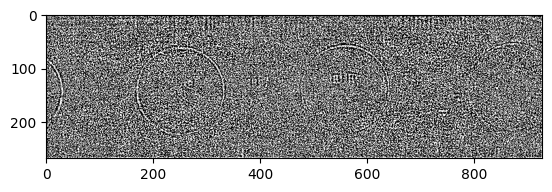

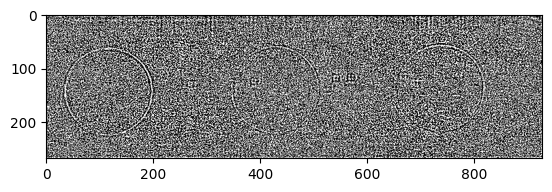

In [60]:
from PIL import Image

imageOrig = Image.open("/home/daniel/Documents/SRCNN_pytorch2/Experiments/Exp1/test/Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000062.tif")
imageSRCNN = Image.open("/home/daniel/Documents/SRCNN_pytorch2/Experiments/Exp1/test/Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000062_srcnn_x4.tif")
imageBicubic = Image.open("/home/daniel/Documents/SRCNN_pytorch2/Experiments/Exp1/test/Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000062_bicubic_x4.tif")

imageOrig2 = Image.open("/home/daniel/Documents/SRCNN_pytorch2/Experiments/Exp1/test/Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000578.tif")
imageBicubic2 = Image.open("/home/daniel/Documents/SRCNN_pytorch2/Experiments/Exp1/test/Cropped_Qc_0p10mLminQ_d0p05Lmin_freq1000Hz_Img000578_bicubic_x4.tif")

imageOrig2 = imageOrig2.resize((imageSRCNN.width, imageSRCNN.height), resample=Image.BICUBIC)
imageOrig = imageOrig.resize((imageSRCNN.width, imageSRCNN.height), resample=Image.BICUBIC)

imageOrig = np.array(imageOrig)
imageOrig2 = np.array(imageOrig2)
imageBicubic2 = np.array(imageBicubic2)

imageSRCNN = np.array(imageSRCNN)

imageBicubic = np.array(imageBicubic)


result = imageOrig - imageSRCNN

resultBicubic = imageOrig - imageBicubic

resultBicubic2 = imageOrig2 - imageBicubic2

plt.figure()
plt.imshow(resultBicubic2, cmap='gray', vmin=0, vmax=255)

plt.figure()
plt.imshow(resultBicubic, cmap='gray', vmin=0, vmax=255)




In [65]:
import os
from PIL import Image

def create_residual_images(lr_dir, hr_dir, output_dir):
    for root, dirs, files in os.walk(lr_dir):
        # Get corresponding HR directory path
        hr_root = os.path.join(hr_dir, os.path.relpath(root, lr_dir))
        # Create corresponding output directory path
        output_root = os.path.join(output_dir, os.path.relpath(root, lr_dir))
        os.makedirs(output_root, exist_ok=True)

        for file in files:
            # Get file paths for LR and HR images
            lr_path = os.path.join(root, file)
            hr_path = os.path.join(hr_root, file)
            # Create output file path for residual image
            output_path = os.path.join(output_root, file)

            # Open LR and HR images
            lr_image = Image.open(lr_path)
            hr_image = Image.open(hr_path)

            hr_image = hr_image.resize((lr_image.width, lr_image.height), resample=Image.BICUBIC)

            lrimage = np.array(lr_image)

            hrimage = np.array(hr_image)

            # Calculate residual image
            residual_image = hrimage - lrimage

            residual_image = Image.fromarray(residual_image)

            # Save residual image
            residual_image.save(output_path)

            # Close LR, HR, and residual images
            lr_image.close()
            hr_image.close()
            residual_image.close()

# Example usage
lr_directory = "/home/daniel/Documents/Super Resolution/Downsampled/x4"
hr_directory = "/home/daniel/Documents/Super Resolution/Preprocessed"
output_directory = "/home/daniel/Documents/Super Resolution/Residual/x4"

create_residual_images(lr_directory, hr_directory, output_directory)
